<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1">Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Closed-Form-Solution:-The-Normal-Equation" data-toc-modified-id="Closed-Form-Solution:-The-Normal-Equation-1.1">Closed-Form Solution: The Normal Equation</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2">Gradient Descent</a></span></li><li><span><a href="#Computational-Complexity" data-toc-modified-id="Computational-Complexity-1.3">Computational Complexity</a></span></li></ul></li></ul></div>

# Linear Regression

Linear Regression is one of the simplest models to start with, because it's the one that we learn about without even diving into data science. The classic "$y = mx + b$" from pre-calculus is ingrained in our head, and it serves as the foundation of our knowledge of linear systems. Applying this knowledge to Linear Regression in machine learning is not a big leap. However, it means that we're working with a higher dimension of data, so this means that we need to talk matrices. 

A Linear Regression model chooses the model parameters that minimize the cost functions over the training set. However, there are two methods to minimize this cost function. 

- *closed-form equation*: an equation (the normal equation) that directly computes the model parameters that minimizes the cost function over the training set.

- *gradient-descent optimization*: an algorithm that gradually tweaks the model parameters to minimize the cost function over the training set.

We might think to ourselves - between an equation that I need to plug numbers into, and building an algorithm that needs to constantly update itself until convergence, why not choose the first one? We'll first take a look at linear regression and the two ways to minimize the cost function. Then, we'll compare and see why the latter method is an industry standard for Linear Regression Models.

**Linear Regression Model**

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2+ \cdots + \theta_nx_n$

- $\hat{y}$ is the predicted value
- $n$ are the number of features
- $x_i$ is the $i$th feature value
- $\theta_0$ is the intercept (or the bias term)
- $\theta_j$ is the $j$th model parameter. 

**Linear Regression Model in Vectorized Form**

$\hat{y} = h_{\boldsymbol{\theta}}(\boldsymbol{x}) = \boldsymbol{\theta} \cdot \boldsymbol{x}$

- $\boldsymbol{\theta}$ is the model's parameter vector, where the first one is the intercept, and the other ones are feature weights.
- $\boldsymbol{x}$ is the feature vector of all the $x$'s, with the first one always equaling to one (the one multiplying the intercept, $\theta_0x_0$)
- $\boldsymbol{\theta} \cdot \boldsymbol{x}$ is the dot product, which eventually equates to the linear model in non-vectorized form. Try it out yourself!
- $h_{\theta}$ is the hypothesis function, with the model parameters as $\theta$.

Now that we have our model, we need a way to measure how our model will do. For example, if we want to minimize the error of a model, then we need to define what an error is! A typical performance measure for regression problems is the Mean Square Error (MSE).

**MSE Cost Function for a Linear Regression Model**

$\text{MSE}(\boldsymbol(X),h_\theta) = \frac{1}{m}\sum_{i=1}^m\big(\boldsymbol\theta^T \boldsymbol{x}^{(i)}-y^{(i)}\big)^2$

- $m$ is the number of datapoints the MSE is evaluating. 
- $h$ is the prediction function (represents the hypothesis). This is what the model will predict. For example, $h(x^{(1)})$ might predict as such: $\hat{y}^{(1)} = h(x^{(1)}) = 500$. (Note the hat on the $y$). This also means that if we want to find the prediction error, then we subtract as such: $\hat{y}^{(1)} - y^{(1)}$.

Our goal is to find a value of $\boldsymbol{\theta}$ that can minimize the cost function.

## Closed-Form Solution: The Normal Equation

There's a closed form solution for this problem. In other words, there exists an equation that can directly solve this once you plug the numbers in.

**The Normal Equation**

$\boldsymbol{\hat{\theta}} = (\boldsymbol{X^TX})^{-1} \boldsymbol{X}^T\boldsymbol{X}$
- $\boldsymbol{\hat{\theta}}$ is the value of $\theta$ that minimizes the cost function
- $y$ is the vector of target values.

Here's the proof that is derived from the MSE and the hypothesis function:

In [1]:
# import notability proof #

Let's try implementing this from scratch. First, we need to generate some linear data.

In [2]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

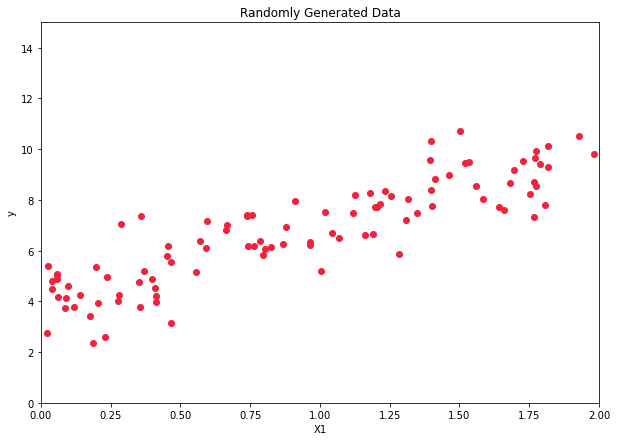

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,7))

plt.scatter(X,y, c = '#ef233c')
plt.title("Randomly Generated Data")
plt.axis([0,2,0,15])
plt.xlabel("X1")
plt.ylabel("y")

plt.show()

From this, let us try to compute $\theta$ from the normal equation. 

In [4]:
X_b = np.c_[np.ones((100,1)), X] # creating a matrix full of 1's 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # theta = (X^TX)^-1 X^T y

If we take a look at how we created the data, we used the following equation:

$y = 4 + 3x_1 + \epsilon$.

Let's see what theta we got:

In [5]:
theta_best

array([[4.00194084],
       [2.96902447]])

This isn't so bad - we expected values of $\theta_0 = 4$ and $\theta_1 = 3$. The variance comes from the noise, which is completely expected. Now, lets try making predictions with `theta_best`

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # adding intercept =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00194084],
       [9.93998979]])

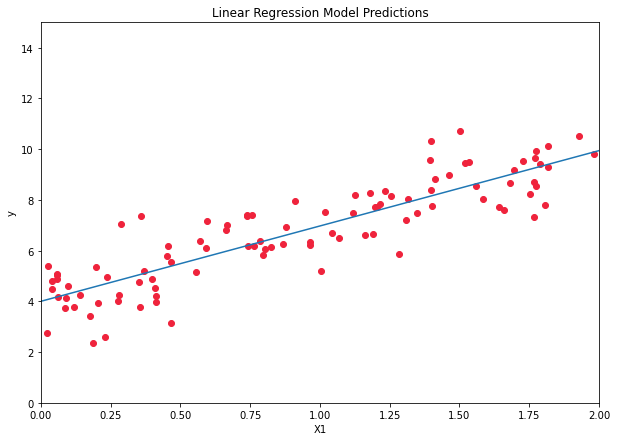

In [7]:
plt.figure(figsize = (10,7))

plt.plot(X_new, y_predict) # prediction line
plt.scatter(X, y, c = '#ef233c') # data points
plt.axis([0,2,0,15])
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Linear Regression Model Predictions")

plt.show()

This looks pretty good. However, we probably don't want to manually create a Linear Regression model every time, and Scikit-Learn has us covered:

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([4.00194084]),
 array([[2.96902447]]),
 array([[4.00194084],
        [9.93998979]]))

We pretty much got the same results. However, this model is implemented a bit differently. We won't get into it much, but the Normal Equation is faulty in edge cases. For example, when the matrix $X^TX$ is not invertible, or if features are redundant, things get messy. Let's take a look at gradient descent:

## Gradient Descent

## Computational Complexity